> Goal of the project: Predict whether stock prices will increase or decrease based on various news headlines.

### Data preprocessing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Project -2 - Predict the stock news headlines/Data.csv',encoding='latin-1')
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,German lawyers to probe Erdogan over alleged w...,"Boris Johnson says the UK will continue to ""in...",Richard Branson is calling on the UK governmen...,Turkey 'sorry for downing Russian jet',Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by Franc

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [6]:
#if label is 1 it means stock price will increase with respect to particular headlines,if 0 it means it will either constant or decrease
#Splitting train and test sets
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [7]:
data=train.iloc[:,2:27]
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [8]:
# Removing not alphabetical characters like digits(0,1,2),special characters(!,%) punctuation marks(.,?), symbols( &, *, +), single and double quotes and etc.
#apart from a-z ,replace all by blank
data.replace("[^a-zA-Z]", " ", inplace=True)
data.replace("[\"']", "", regex=True, inplace=True)
data.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A hindrance to operations: extracts from the l...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupars debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohls successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Dianas landmine crusade put Tories in a panic,Yeltsins resignation caught opposition flat-fo...,Russian roulette,Sold out,Recovering a title


In [9]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
new_Index

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [10]:
data.columns= new_Index
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations: extracts from the l...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupars debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohls successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Dianas landmine crusade put Tories in a panic,Yeltsins resignation caught opposition flat-fo...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins furious at Fosters lack of Hannibal ap...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA mans extradition to Nort...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldnt know without the m...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,Uniteds rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tonys pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on ear...,Englands decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence unreliable, defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of laws hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks play now, pay later L...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [11]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974],
           dtype='int64', length=3975)

In [12]:
len(data)

3975

In [13]:
### accessing data of 1st column
data['0']

0       A hindrance to operations: extracts from the l...
1                                               Scorecard
2                       Coventry caught on counter by Flo
3                           Pilgrim knows how to progress
4                                    Hitches and Horlocks
                              ...                        
3970    Brazil declares emergency after 2,400 babies a...
3971    Germany recruits 8,500 teachers to teach Germa...
3972    Pentagon thwarts Obamas effort to close Guanta...
3973    Tech companies face criminal charges if they n...
3974    Microsoft Corp said on Wednesday it will begin...
Name: 0, Length: 3975, dtype: object

In [14]:
# Convertng headlines to lower case
#why str.lower on 0,1,2---- bcz we can apply function on a column only
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations: extracts from the l...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupars debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohls successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",dianas landmine crusade put tories in a panic,yeltsins resignation caught opposition flat-fo...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins furious at fosters lack of hannibal ap...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira mans extradition to nort...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldnt know without the m...,millennium bug fails to bite
2,coventry caught on counter by flo,uniteds rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tonys pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by shambles but lays blame on ear...,englands decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence unreliable, defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of laws hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks play now, pay later l...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft


In [15]:
##print entire data of 2nd row
print(data.iloc[1,0:25])

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins furious at fosters lack of hannibal ap...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

In [16]:
#create a list of all headlines for row 2,as 25 headlines in row 2
' '.join([str(x) for x in data.iloc[1,0:25]])

'scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins furious at fosters lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira mans extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldnt know without the movies millennium bug fails to bite'

In [17]:
## create a list headlines to insert all the headlines of all rows
headlines=[]
for row in range(0,len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[row,0:25]]))
headlines[0:3]

['a hindrance to operations: extracts from the leaked reports scorecard hughes instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils evertons party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupars debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like its 1999 wear wolves have turned into lambs stump mike catches testy goughs taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohls successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor dianas landmine crusade put tories in a panic yeltsins resignation caught opposition flat-footed russian roulette sold out recovering a title',
 'scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommend

### Applying Bag of Words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [19]:
## implement BAG OF WORDS
#ngram_range =(2,2) is used to select bigrams. However unigrams are selected as single words and their counts, bigrams are selected two word combination and their counts
cv=CountVectorizer(ngram_range=(2,2))
traindata_x=cv.fit_transform(headlines)

In [20]:
#Applying random forest algorithm to train set
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [21]:
## Datapreprocessing for the Test Dataset
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))


In [22]:
test_data = cv.transform(test_transform)

In [23]:
predictions = randomclassifier.predict(test_data)

###Checking accuracy and plotting confusion matrix

In [24]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
score=accuracy_score(test['Label'],predictions)
print(score)
print('*************************************************************')
report=classification_report(test['Label'],predictions)
print(report)

0.8518518518518519
*************************************************************
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       186
           1       0.80      0.95      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378




### Plotting confusion matrix




In [25]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[140  46]
 [ 10 182]]


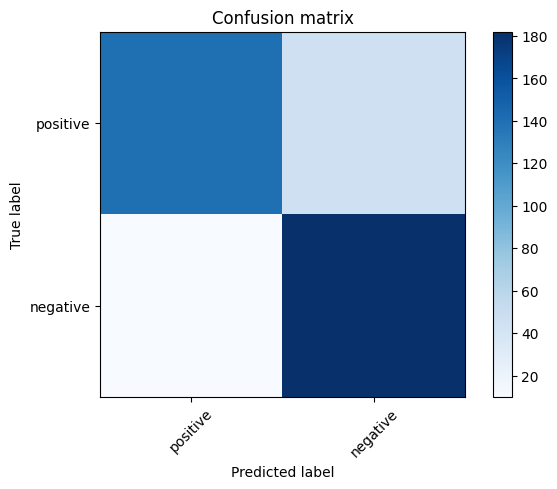

In [26]:
plt.figure()
cm=confusion_matrix(test['Label'],predictions)
print(cm)
plot_confusion_matrix(cm)
plt.show()

### Implement MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindata_x,train['Label'])
predictions = nb.predict(test_data)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[134  52]
 [ 10 182]]
0.8359788359788359
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       186
           1       0.78      0.95      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.84      0.83       378



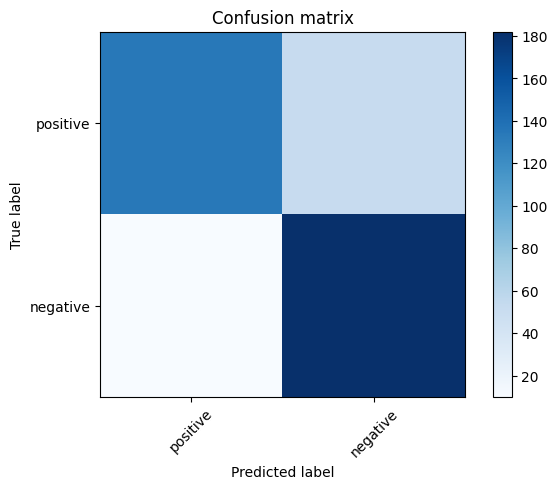

In [28]:
plot_confusion_matrix(matrix)